In [1]:
import numpy as np
import matplotlib.pyplot as plt
import odl
from odl.contrib import tomo

space = odl.uniform_discr([-112,-112,0],[112,112,224], 128)

geo = tomo.elekta_icon_geometry(num_angles=128)

# load data

y_n = np.load("noisy_sinogram.npy")


A = odl.tomo.operators.ray_trafo.RayTransform(space, geo, impl='astra_cuda')

alpha = 0.543304938272
eps = 3.70408163265e-05

# Construct gradient
x_grad = odl.discr.diff_ops.Gradient(space)
huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

norm_y =  odl.solvers.functional.default_functionals.L2Norm(A.range) 
norm_y2 =  odl.solvers.functional.default_functionals.L2NormSquared(A.range) 

data_fidel = norm_y2.translated(y_n)*A

var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad
# var_model.gradient.norm(estimate=True)

print(A.norm(estimate=True))


/home/gustaf/src/SF2529_HT25/.venv/lib/python3.12/site-packages/odl/util/utility.py:1398: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_requirements


36.8087897582


In [2]:
x = space.zero()
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 20)

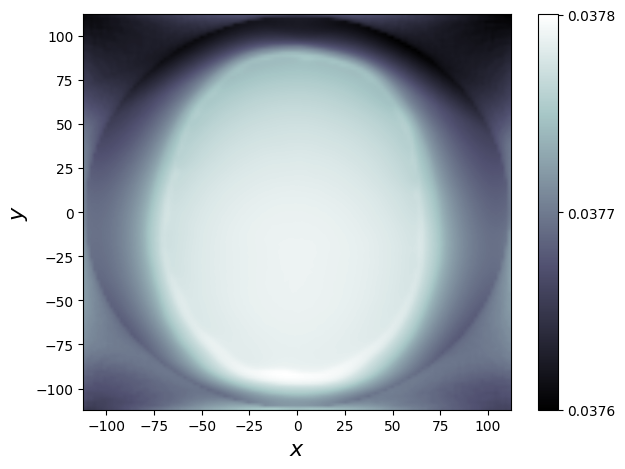

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.944435489064


In [3]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [4]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 200)

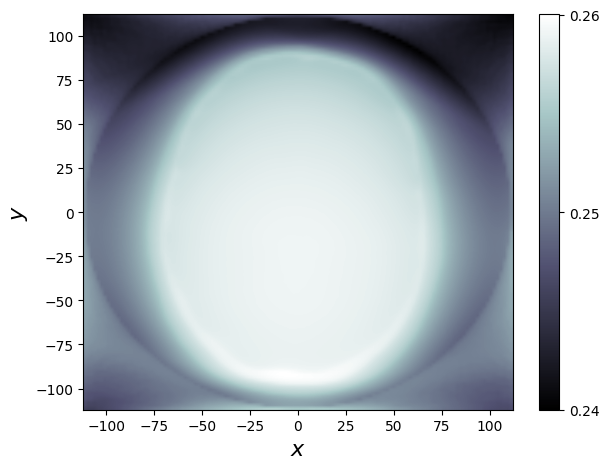

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.653714834629


In [5]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [6]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 500)

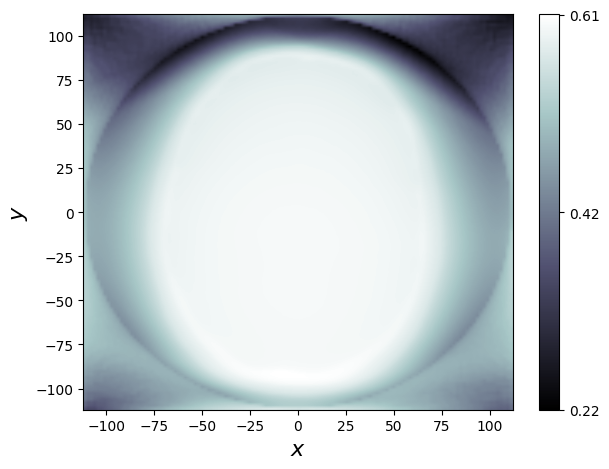

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.350847749611


In [7]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [8]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 1000)

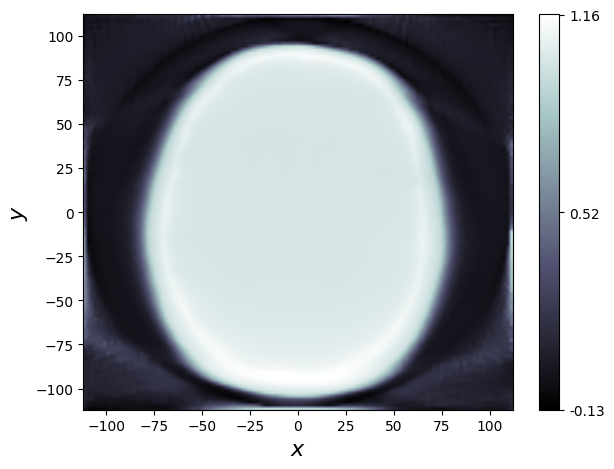

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.111828322941


In [9]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [10]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 4000)

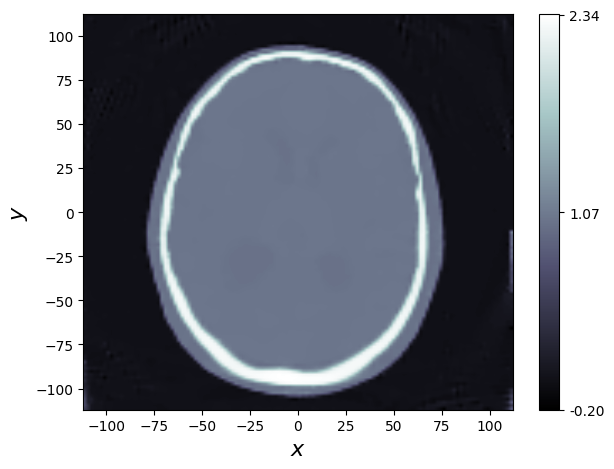

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.0186892399927


In [11]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [12]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 2000)

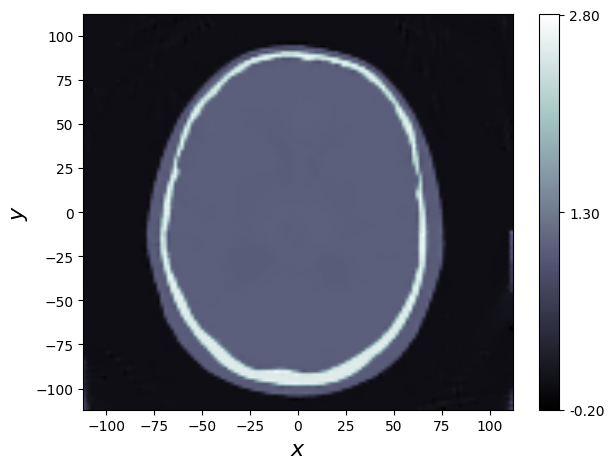

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.0139985118206


In [13]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [14]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 2000)

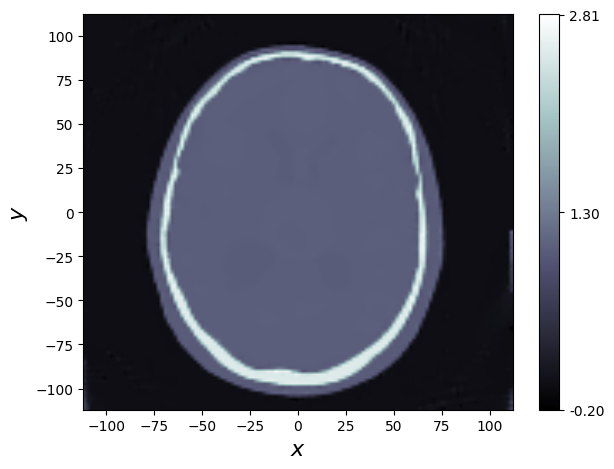

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.0139818758998


In [15]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [16]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 2000)

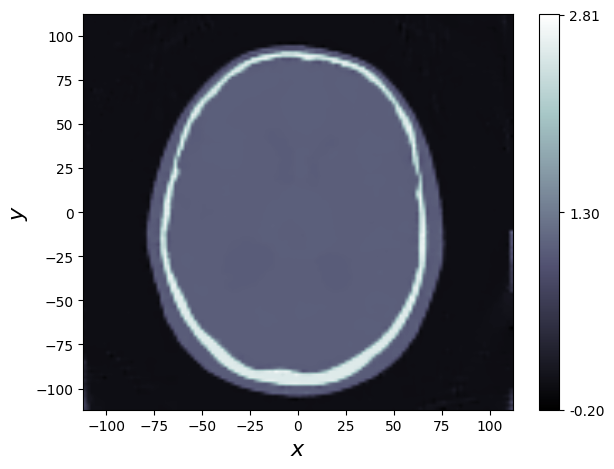

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.0139817288225


In [17]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [18]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 2000)

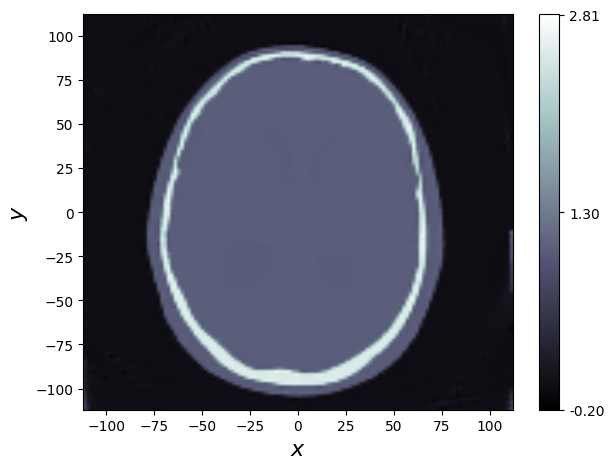

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.0139819256635


In [19]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [20]:
odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 6000)

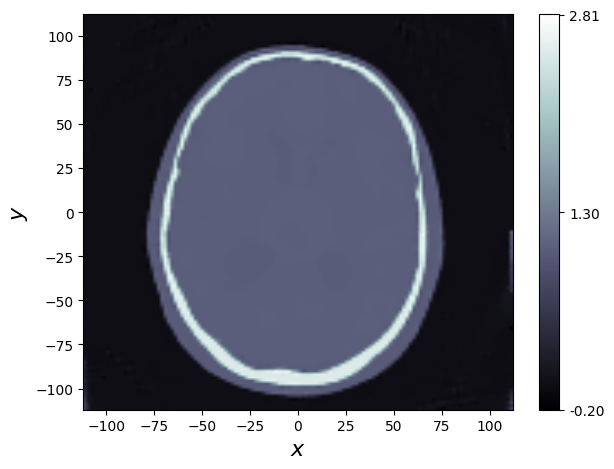

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.013981777744


In [21]:
x.show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

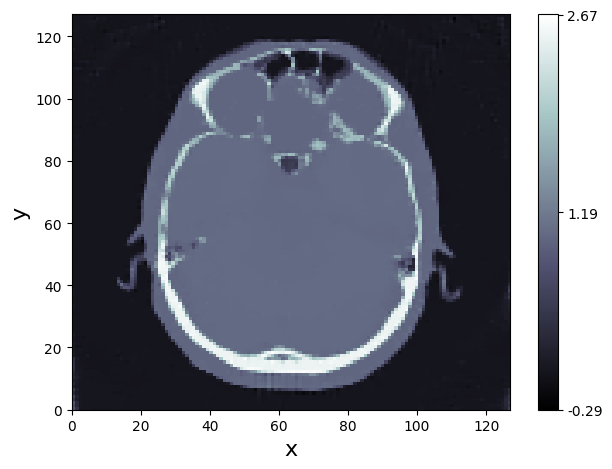

<Figure size 640x480 with 0 Axes>

Relative difference to noisy y:  0.013981777744


In [36]:
x[:,:,36].show()

print("Relative difference to noisy y: ", (np.sqrt(data_fidel(x))/ norm_y(y_n)))

In [37]:
x_arr = x.asarray()

np.save("x_solved.npy", x_arr)